In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
import math

In [2]:
sys.path.append('Model/')

In [3]:
import dftModel as dft
import utilFunctions as uf

In [129]:
(fs, x) = uf.wavread('Sound/flute-C.wav')

In [130]:
x.size

423360

In [131]:
pin = 5000
N = 2**9
w = np.hamming(N-1)
hM1 = int(math.floor((w.size+1)/2)) 
hM2 = int(math.floor(w.size/2)) 

li1 = np.arange(1,N/2+2)

while pin<x.size:
    if (pin+hM2)>x.size:
        break;
    x1 = x[pin-hM1:pin+hM2]
    mX, pX = dft.dftAnal(x1, w, N)
    li1 = np.vstack((li1,mX))
    pin+=5000

In [132]:
li1.shape

(85, 257)

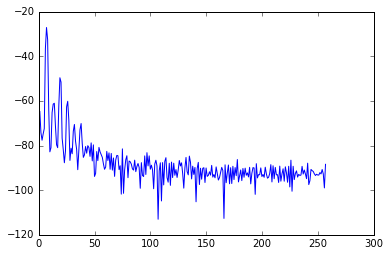

In [133]:
plt.plot(li1[0,:],li1[6,:])

In [134]:
np.savetxt('flute-train.csv',li1,delimiter=',',fmt='%.1f')